MODELO PROYECTO 3 

In [56]:
import sys
from packaging import version
import sklearn
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import pandas as pd
from sklearn.model_selection import train_test_split

In [57]:
#Carga de datos
df = pd.read_csv("data_limpia.csv", delimiter = ",")
df.describe()
df_mdl = df[["cole_bilingue","cole_calendario","cole_naturaleza","cole_sede_principal","estu_genero","fami_cuartoshogar","fami_educacionmadre","fami_educacionpadre","fami_estratovivienda","fami_personashogar","fami_tieneautomovil","fami_tienecomputador","fami_tieneinternet","fami_tienelavadora","punt_global","caracter_COMPLETA","caracter_MAÑANA","caracter_NOCHE","caracter_SABATINA","caracter_TARDE","caracter_UNICA","caracter_ACADÉMICO","caracter_NO APLICA","caracter_TÉCNICO","caracter_TÉCNICO/ACADÉMICO","genero_FEMENINO","genero_MASCULINO","genero_MIXTO"]]

MODELO LION

In [58]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

OPTIMIZADORES

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

# Assuming 'df' is your DataFrame
df_mdl = df[[
    "cole_bilingue", "cole_calendario", "cole_naturaleza", "cole_sede_principal", "estu_genero",
    "fami_cuartoshogar", "fami_educacionmadre", "fami_educacionpadre", "fami_estratovivienda",
    "fami_personashogar", "fami_tieneautomovil", "fami_tienecomputador", "fami_tieneinternet",
    "fami_tienelavadora", "punt_global", "caracter_COMPLETA", "caracter_MAÑANA", "caracter_NOCHE",
    "caracter_SABATINA", "caracter_TARDE", "caracter_UNICA", "caracter_ACADÉMICO", "caracter_NO APLICA",
    "caracter_TÉCNICO", "caracter_TÉCNICO/ACADÉMICO", "genero_FEMENINO", "genero_MASCULINO", "genero_MIXTO"
]]

# Split the data into training+validation and test sets
df_train_full, df_test = train_test_split(df_mdl, test_size=0.2, random_state=42)

# Split the training+validation set into training and validation sets
df_train, df_valid = train_test_split(df_train_full, test_size=0.2, random_state=42)

# Separate features and target
X_train = df_train.drop(columns='punt_global')
y_train = df_train['punt_global']

X_valid = df_valid.drop(columns='punt_global')
y_valid = df_valid['punt_global']

X_test = df_test.drop(columns='punt_global')
y_test = df_test['punt_global']

# Define the models
model_adam = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model_sgd = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model_rmsprop = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model_adagrad = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the models with different optimizers
model_adam.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
model_sgd.compile(optimizer=SGD(), loss='mean_squared_error', metrics=['mae'])
model_rmsprop.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['mae'])
model_adagrad.compile(optimizer=Adagrad(), loss='mean_squared_error', metrics=['mae'])

# Train the models
history_adam = model_adam.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
history_sgd = model_sgd.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
history_adagrad = model_adagrad.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))


Epoch 1/100
3118/3118 [==============================] - 8s 2ms/step - loss: 3186.9089 - mae: 40.4891 - val_loss: 1696.8159 - val_mae: 33.0786
Epoch 2/100
3118/3118 [==============================] - 6s 2ms/step - loss: 1661.8617 - mae: 32.8175 - val_loss: 1705.6703 - val_mae: 32.8423
Epoch 3/100
3118/3118 [==============================] - 6s 2ms/step - loss: 1636.0354 - mae: 32.5538 - val_loss: 1649.3037 - val_mae: 32.4833
Epoch 4/100
3118/3118 [==============================] - 6s 2ms/step - loss: 1625.6342 - mae: 32.4501 - val_loss: 1629.0272 - val_mae: 32.3335
Epoch 5/100
3118/3118 [==============================] - 6s 2ms/step - loss: 1617.9117 - mae: 32.3659 - val_loss: 1621.1166 - val_mae: 32.6010
Epoch 6/100
3118/3118 [==============================] - 6s 2ms/step - loss: 1609.8560 - mae: 32.2790 - val_loss: 1610.9795 - val_mae: 32.4174
Epoch 7/100
3118/3118 [==============================] - 6s 2ms/step - loss: 1607.1173 - mae: 32.2589 - val_loss: 1650.1326 - val_mae: 32.3977

In [87]:
print("Adam optimizer:")
print("  - Loss:", history_adam.history['val_loss'][-1])
print("  - MAE:", history_adam.history['val_mae'][-1])

print("\nSGD optimizer:")
print("  - Loss:", history_sgd.history['val_loss'][-1])
print("  - MAE:", history_sgd.history['val_mae'][-1])

print("\nRMSprop optimizer:")
print("  - Loss:", history_rmsprop.history['val_loss'][-1])
print("  - MAE:", history_rmsprop.history['val_mae'][-1])

print("\nAdagrad optimizer:")
print("  - Loss:", history_adagrad.history['val_loss'][-1])
print("  - MAE:", history_adagrad.history['val_mae'][-1])


Adam optimizer:
  - Loss: 1585.0849609375
  - MAE: 32.277957916259766

SGD optimizer:
  - Loss: 2337.466552734375
  - MAE: 39.09977722167969

RMSprop optimizer:
  - Loss: 1571.626953125
  - MAE: 31.847543716430664

Adagrad optimizer:
  - Loss: 1854.158935546875
  - MAE: 34.65102767944336


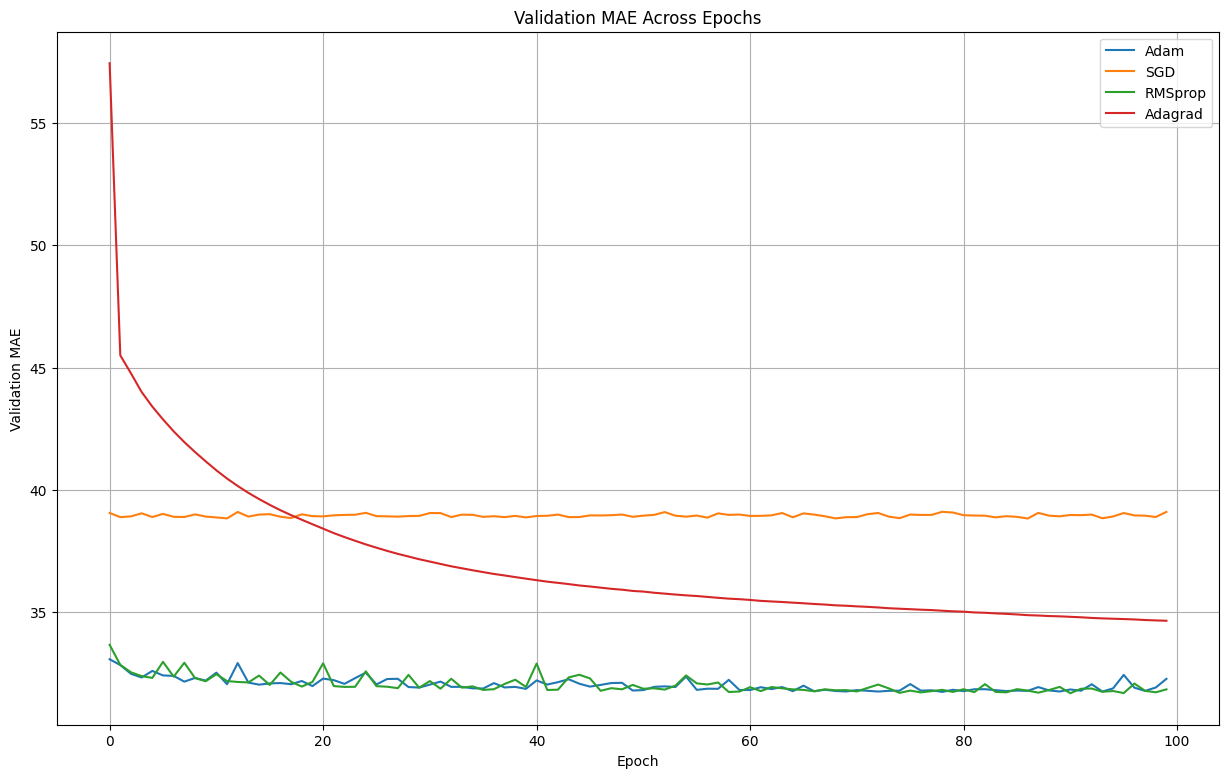

In [89]:
import matplotlib.pyplot as plt

# Plot validation MAE for each optimizer
plt.figure(figsize=(15, 9))

plt.plot(history_adam.history['val_mae'], label='Adam')
plt.plot(history_sgd.history['val_mae'], label='SGD')
plt.plot(history_rmsprop.history['val_mae'], label='RMSprop')
plt.plot(history_adagrad.history['val_mae'], label='Adagrad')

plt.title('Validation MAE Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.legend()
plt.grid(True)

plt.show()